In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

In [2]:
def rgb2rg(image):
    # Convert the image from 8-bit RGB to floating point
    image = image.astype(np.float32)
    sum_rgb = np.sum(image, axis=2, keepdims=True)
    sum_rgb[sum_rgb == 0] = 1
    r = image[:, :, 0] / sum_rgb[:, :, 0]
    g = image[:, :, 1] / sum_rgb[:, :, 0]
    return r, g

In [3]:
def fit_gmm(r, g, n_components=3, n_init=10):
    # Stack r and g components into a 2D array
    rg = np.column_stack((r.flatten(), g.flatten()))
    # Fit a GMM with multiple random initializations
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', n_init=n_init, random_state=42)
    gmm.fit(rg)
    return gmm

In [4]:
def plot_gmm_fit(gmm, r, g):
    # Scatter plot of the rg chromaticities
    plt.figure(figsize=(8, 8))
    plt.scatter(r, g, s=0.5, c='gray')
    
    # Plot contours for each GMM component
    for i in range(gmm.n_components):
        mean = gmm.means_[i]
        cov = gmm.covariances_[i]
        
        # Calculate the contour for the component
        x, y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
        pos = np.dstack((x, y))
        rv = multivariate_normal(mean, cov)
        plt.contour(x, y, rv.pdf(pos), levels=[np.exp(-4.5)], colors='red')
        
        # Plot the mean
        plt.scatter(mean[0], mean[1], c='red', marker='+', s=100)
    
    plt.title('GMM Fit with Contours')
    plt.xlabel('r')
    plt.ylabel('g')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.grid(True)
    plt.show()

In [5]:
def compute_posterior_probabilities(gmm, r, g):
    # Stack r and g components into a 2D array
    rg = np.column_stack((r.flatten(), g.flatten()))
    
    # Compute posterior probabilities
    probabilities = gmm.predict_proba(rg)
    
    # Reshape probabilities back into image format
    h, w = r.shape
    segmented_images = []
    for i in range(gmm.n_components):
        segmented_image = probabilities[:, i].reshape(h, w)
        # Normalize and convert to 8-bit grayscale
        segmented_image = (255 * segmented_image).astype(np.uint8)
        segmented_images.append(segmented_image)
    
    return segmented_images

In [6]:
def display_segmented_images(segmented_images):
    # Display each segmented image
    for i, img in enumerate(segmented_images):
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.title(f'Segmentation for Component {i+1}')
        plt.axis('off')
        plt.show()

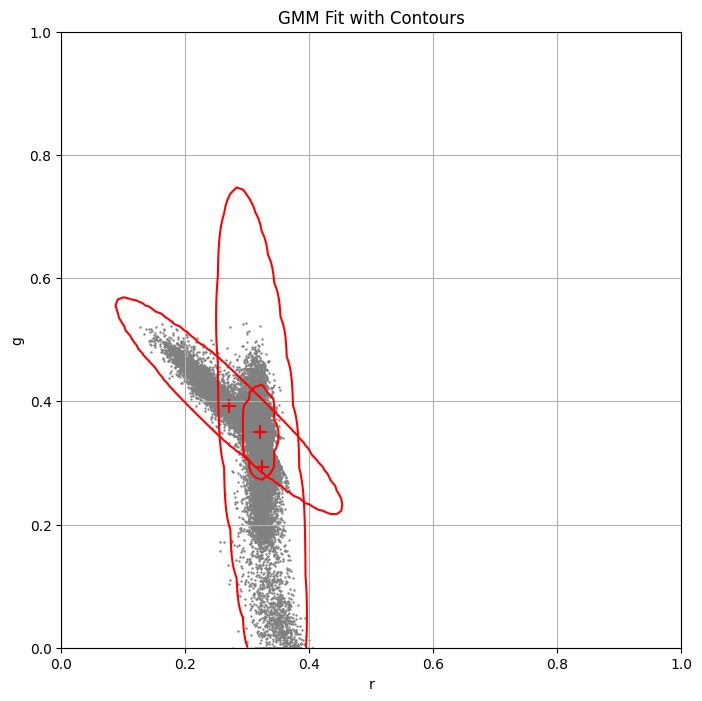

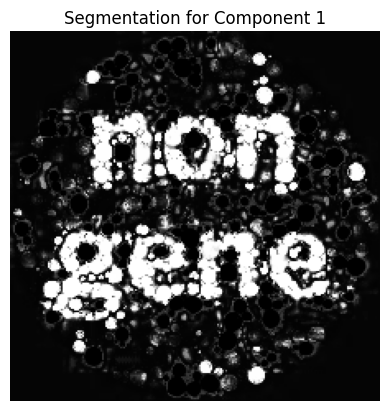

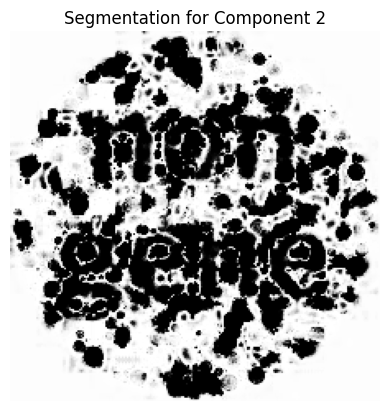

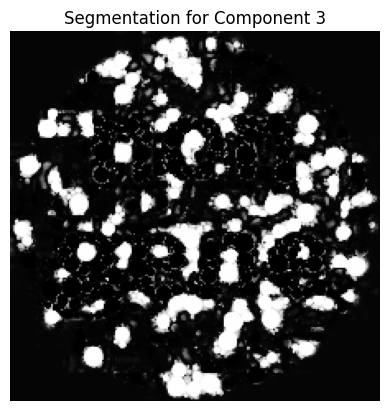

In [7]:
image = cv2.imread('GMMSegmentTestImage.jpg')
# Convert the RGB image to rg chromaticity space
r, g = rgb2rg(image)

# Fit a GMM with K=3
gmm = fit_gmm(r, g, n_components=3, n_init=10)

# Plot the GMM fit
plot_gmm_fit(gmm, r.flatten(), g.flatten())

# Compute posterior probabilities for each pixel
segmented_images = compute_posterior_probabilities(gmm, r, g)

# Display the segmented images
display_segmented_images(segmented_images)

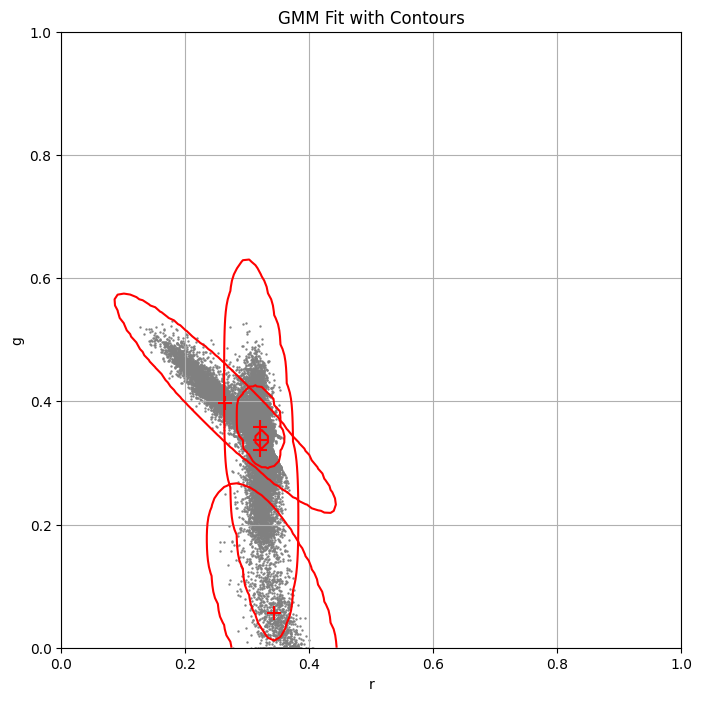

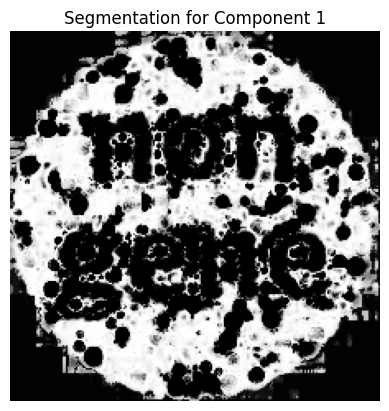

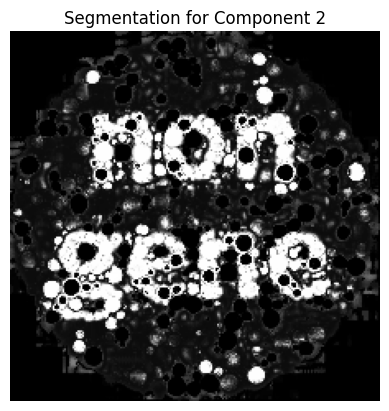

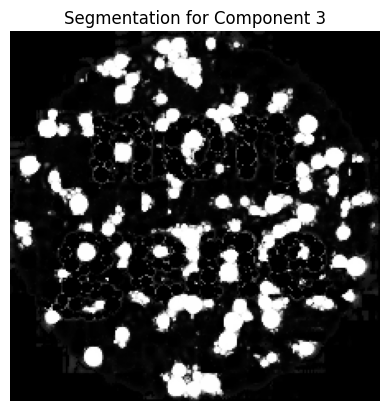

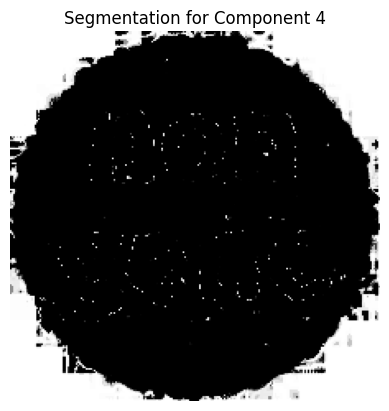

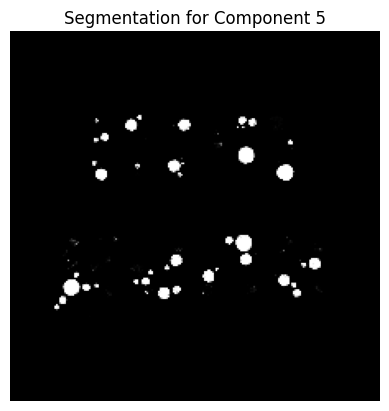

In [8]:
image = cv2.imread('GMMSegmentTestImage.jpg')
# Convert the RGB image to rg chromaticity space
r, g = rgb2rg(image)

# Fit a GMM with K=3
gmm = fit_gmm(r, g, n_components=4, n_init=10)

# Plot the GMM fit
plot_gmm_fit(gmm, r.flatten(), g.flatten())

# Compute posterior probabilities for each pixel
segmented_images = compute_posterior_probabilities(gmm, r, g)

# Display the segmented images
display_segmented_images(segmented_images)